1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [1]:
import numpy as np

In [3]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [4]:
b = (np.mean(zp * ks) - np.mean(zp) * np.mean(ks)) / (np.mean(zp**2) - np.mean(zp)**2)
b

2.620538882402765

In [5]:
n = 10
b1 = (n * (zp * ks).sum() - zp.sum() * ks.sum()) / (n * (zp**2).sum() - zp.sum()**2)
b1

2.6205388824027653

In [7]:
a = np.mean(ks) - b * np.mean(zp)
a

444.1773573243596

In [8]:
ks_hat = a + b * zp
ks_hat

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

In [9]:
ks

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

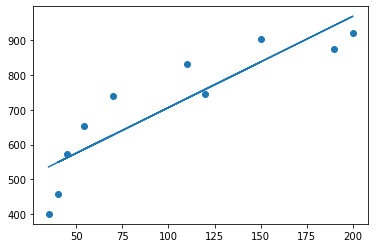

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(zp, ks)
plt.plot(zp, a + b * zp)
plt.show()

In [11]:
mse = ((ks - ks_hat)**2).sum() / n
mse

6470.414201176658

In [13]:
ZP = zp.reshape((10,1))
ZP

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [14]:
KS = ks.reshape((10,1))
KS

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [15]:
ZP = np.hstack([np.ones((10,1)),ZP])
ZP

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [16]:
B = np.dot(np.linalg.inv(np.dot(ZP.T,ZP)),ZP.T @KS)
B

array([[444.17735732],
       [  2.62053888]])

In [17]:
ZP = zp.reshape((10,1))
ZP

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [18]:
B = np.dot(np.linalg.inv(np.dot(ZP.T,ZP)),ZP.T @KS)
B

array([[5.88982042]])

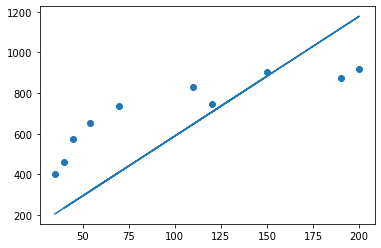

In [19]:
plt.scatter(zp, ks)
plt.plot(zp, 5.8898 * zp)
plt.show()

In [20]:
ks_hat = 5.8898 * zp
ks_hat

array([ 206.143 ,  265.041 , 1119.062 , 1177.96  ,  235.592 ,  412.286 ,
        318.0492,  883.47  ,  706.776 ,  647.878 ])

In [21]:
mse = ((ks - ks_hat)**2).sum() / n
mse

56516.858421464

2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

$mse=\frac{\sum (\beta_1 \cdot zp - ks)^2}{n}$

$mse'=\frac{2\sum (\beta_1 \cdot zp - ks) \cdot zp}{n}$

In [23]:
def mse(beta1,ks=ks,zp=zp,n=10):
    return np.sum((beta1 * zp - ks)**2) / n

In [24]:
mse(5.8898)

56516.858421464

In [28]:
alpha = 1e-6
beta1 = 1
n = 10

In [30]:
for i in range(1000):
    beta1 -= alpha * (2 / n) * np.sum((beta1 * zp - ks) * zp)
    if i % 100 == 0:
        print(f'beta1 = {beta1}, mse = {mse(beta1)}')

beta1 = 5.8898204201291975, mse = 56516.8584157194
beta1 = 5.889820420132476, mse = 56516.85841571941
beta1 = 5.889820420132673, mse = 56516.85841571943
beta1 = 5.889820420132673, mse = 56516.85841571943
beta1 = 5.889820420132673, mse = 56516.85841571943
beta1 = 5.889820420132673, mse = 56516.85841571943
beta1 = 5.889820420132673, mse = 56516.85841571943
beta1 = 5.889820420132673, mse = 56516.85841571943
beta1 = 5.889820420132673, mse = 56516.85841571943
beta1 = 5.889820420132673, mse = 56516.85841571943


3. (необязательная) Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

$mse=\frac{\sum (\beta_0 + \beta_1 \cdot zp - ks)^2}{n}$

$mse'_0=\frac{2\sum (\beta_0 + \beta_1 \cdot zp - ks)}{n}$

$mse'_1=\frac{2\sum (\beta_0 + \beta_1 \cdot zp - ks) \cdot zp}{n}$

In [31]:
def mse_(beta0,beta1,ks=ks,zp=zp,n=10):
    return np.sum((beta0 + beta1 * zp - ks)**2) / n

In [32]:
mse_(444.177,2.621)

6470.417097199999

In [55]:
alpha = 2e-5
beta0 = 3
beta1 = 3
n = 10

In [56]:
for i in range(2000000):
    beta0 -= alpha * (2 / n) * np.sum(beta0 + beta1 * zp - ks)
    beta1 -= alpha * (2 / n) * np.sum((beta0 + beta1 * zp - ks) * zp)
    if i % 10000 == 0:
        print(f'beta0 = {beta0}, beta1 = {beta1}, mse = {mse_(beta0,beta1)}')

beta0 = 3.016108, beta1 = 4.580242665952, mse = 78672.0519959165
beta0 = 45.59068811457183, beta1 = 5.554283227590901, mse = 46770.49657408121
beta0 = 84.04884294698692, beta1 = 5.271217076659035, mse = 39368.862445060644
beta0 = 118.79631253233572, beta1 = 5.015462932628795, mse = 33326.634663475124
beta0 = 150.1911271781775, beta1 = 4.784385560879087, mse = 28394.140577956867
beta0 = 178.55677217070775, beta1 = 4.575603990839547, mse = 24367.56316592687
beta0 = 204.1855208962173, beta1 = 4.386966982991858, mse = 21080.519051130723
beta0 = 227.34144636198178, beta1 = 4.216530862969417, mse = 18397.183327760205
beta0 = 248.26314214661835, beta1 = 4.06253949436291, mse = 16206.677100020552
beta0 = 267.1661808160096, beta1 = 3.9234061838757732, mse = 14418.485823030753
beta0 = 284.24533513575153, beta1 = 3.79769733238439, mse = 12958.719124991283
beta0 = 299.67658496702154, beta1 = 3.6841176634470774, mse = 11767.057561642176
beta0 = 313.6189305244864, beta1 = 3.5814968770596054, mse = 1

beta0 = 444.16582807645744, beta1 = 2.620623741903722, mse = 6470.414234894703
beta0 = 444.16694049098265, beta1 = 2.6206155541240626, mse = 6470.414228701944
beta0 = 444.1679455727436, beta1 = 2.620608156352987, mse = 6470.41422364657
beta0 = 444.1688536778784, beta1 = 2.620601472365513, mse = 6470.414219519672
beta0 = 444.1696741633061, beta1 = 2.62059543329128, mse = 6470.414216150745
beta0 = 444.17041548312335, beta1 = 2.6205899769050287, mse = 6470.414213400557
beta0 = 444.17108527573225, beta1 = 2.620585046985313, mse = 6470.414211155481
beta0 = 444.17169044252984, beta1 = 2.620580592735316, mse = 6470.414209322742
beta0 = 444.1722372190179, beta1 = 2.6205765682594517, mse = 6470.414207826608
beta0 = 444.1727312390633, beta1 = 2.620572932090391, mse = 6470.414206605256
beta0 = 444.1731775929368, beta1 = 2.6205696467618704, mse = 6470.414205608223
beta0 = 444.1735808797765, beta1 = 2.620566678422543, mse = 6470.414204794312
beta0 = 444.1739452549581, beta1 = 2.620563996487318, mse